In [35]:
%load_ext autoreload
%autoreload 2

from src import GarminActivity, GarminConnector, StravaActivity, StravaConnector, GPSFixer, RunalyzeConnector
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

start_date = '2023-12-29'
stop_date = '2024-01-01'

# Import authentication data
garmin_auth_file = Path.home() / Path('garmin_authentication.json')
strava_auth_file = Path.home() / Path('strava_authentication.json')
strava_new_auth_file = strava_auth_file.with_name(strava_auth_file.stem + '_new' + strava_auth_file.suffix)
runalyze_auth_file = Path.home() / Path('runalyze_authentication.json')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
garmin_connect = GarminConnector()
garmin_connect.load_auth_dict(garmin_auth_file)
garmin_connect.setup_client()
garmin_connect.get_type_activities(after=start_date, before=stop_date)
garmin_connect.get_activity(garmin_connect.activity_ids[0])
garmin_connect.save_tcx(Path.home() / Path('gpsfix/data/garmin/activity_test.tcx'), overwrite=True)

In [19]:
garmin_act = GarminActivity(Path.home() / Path('gpsfix/data/garmin/activity_test.tcx'))
garmin_act.activity.start_time

datetime.datetime(2023, 12, 30, 11, 57, 33)

In [36]:
strava_connect = StravaConnector()
strava_connect.load_auth_dict(str(strava_new_auth_file))

In [37]:
strava_connect.refresh_tokens() #check_and_refresh_tokens()
strava_connect.write_auth_file(strava_new_auth_file)

In [38]:
strava_connect.get_type_activities(after = start_date+'T00:00:00', before = stop_date+'T23:59:59', limit=10, append=False)
strava_connect.get_activity(strava_connect.activity_ids[0])
strava_connect.get_activity_streams(identifier=strava_connect.activity_ids[0])

In [23]:
strava_act = StravaActivity(details=strava_connect.activity_dict, streams=strava_connect.activity_streams)
strava_act.details['start_date']

datetime.datetime(2023, 12, 30, 11, 57, 33, tzinfo=datetime.timezone.utc)

In [24]:
gpx_fix = GPSFixer(garmin_activity=garmin_act, strava_activity=strava_act)

In [25]:
gpx_fix.find_overlapping_times()

In [26]:
print(gpx_fix.start_time, gpx_fix.stop_time)

2023-12-30T11:57:33.000000 2023-12-30T12:30:46.000000


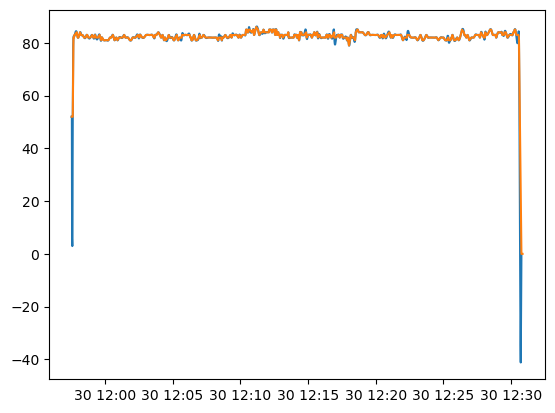

In [27]:
gpx_fix.interpolate_garmin_cadence(only_overlap=True)
plt.plot(gpx_fix.strava.times, gpx_fix.strava.waypoints['cadences'])
plt.plot(gpx_fix.garmin.times, gpx_fix.garmin.cadences)

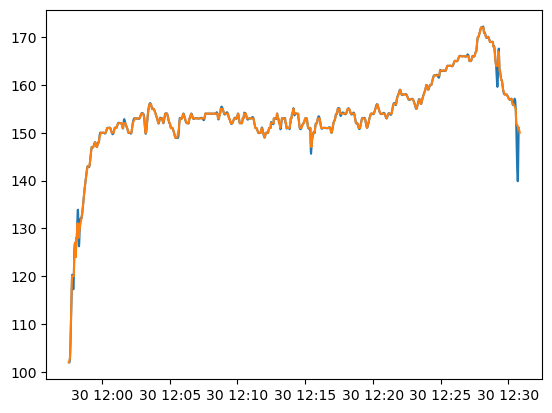

In [28]:
gpx_fix.interpolate_garmin_heartrate(only_overlap=True)
plt.plot(gpx_fix.strava.times, gpx_fix.strava.waypoints['heartrates'])
plt.plot(gpx_fix.garmin.times, gpx_fix.garmin.heartrates)

In [29]:
gpx_fix.create_gpx()

In [30]:
gpx_fix.save_gpx(output_file=Path.home() / Path('gpsfix/data/strava/activity_test_fixed.gpx'), overwrite=True)

In [31]:
runalyze_connect = RunalyzeConnector()
runalyze_connect.load_auth_dict(runalyze_auth_file)

In [34]:
runalyze_connect.upload_activity(Path.home() / Path('gpsfix/data/strava/activity_test_fixed.gpx'))

b'{"status":"success","activity_id":null,"original_file":"activity_test_fixed.gpx","queue_id":5650693}'
